In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")

## Exercícios 1

Busque um banco de dados referente a uma situação real com no mínimo cinquenta pontos que relacionam duas grandezas entre si. Este banco de dados pode ser obtido pela internet (indicando a fonte) ou podem ser produzidos pelo próprio aluno na forma de dados experimentais. Neste caso, faz-se necessária uma breve contextualização da situação em que os dados foram obtidos.

Faça um ajuste de curva a partir dos dados desse banco, considerando as seguintes situações:

#### a) Ajuste linear;

#### b) Ajuste exponencial ou de função potênca. Escolha a forma que melhor se ajuste ao seu banco de dados, de acordo com seu julgamento.

#### c) Ajuste polinomial (usando a forma multilinear) de grau maior ou igual a 3. Faça a escolha do grau do polinômio de acordo com o banco de dados usado.


Para cada caso, plote em um mesmo gráfico o conjunto de pontos do banco de dados e a curva ajustada. O arquivo .pdf deve conter o banco de dados, na forma de tabela, as principais matrizes obtidas durante a solução, os gráficos solicitados e o valor do $R^2$, além dos códigos que geraram os resultados.

## Exercício 2

Usando a regra dos trapézios e a regra de Simpson, obtenha o valor aproximado das integrais que seguem, escolhendo o particionamento adequado para obter precisão $\epsilon=10^{-3}$. Apresente a tabela com os pontos (xi, yi) usados, bem como o código computacional usado na solução  (se a opção for por resolver computacionalmente).

In [ ]:
def regra_trapezios(a, b, n):
    h = (b - a) / n
    xi = np.linspace(a, b, n+1)
    yi = funcao(xi)
    resultado = h * (np.sum(yi) - 0.5 * (yi[0] + yi[-1]))
    return xi, yi, resultado

def regra_simpson(a, b, n):
    h = (b - a) / n
    xi = np.linspace(a, b, n+1)
    yi = funcao(xi)
    resultado = h / 3 * (np.sum(yi[0:-1:2]) + 4 * np.sum(yi[1::2]) + yi[-1])
    return xi, yi, resultado

def encontrar_particionamento(a, b, metodo, epsilon):
    n = 2  # Começamos com 2 subintervalos
    erro = float('inf')

    while erro > epsilon:
        if metodo == regra_trapezios:
            xi, yi, resultado_atual = regra_trapezios(a, b, n)
        elif metodo == regra_simpson:
            xi, yi, resultado_atual = regra_simpson(a, b, n)
        else:
            raise ValueError("Método não reconhecido.")

        if n > 2:
            erro = np.abs(resultado_atual - resultado_anterior) / 3
        resultado_anterior = resultado_atual
        n *= 2

    return xi, yi, resultado_atual


### A) $\int_{a}^{b} e^{-x^{2}} \,dx$

####Regra dos Trapézios

In [ ]:
def funcao(x):
    return np.exp(-x**2)

# Intervalo de integração
a = 0
b = 1

# Precisão desejada
epsilon = 1e-3

# Calculando usando a regra dos trapézios
xi_trapezios, yi_trapezios, resultado_trapezios = encontrar_particionamento(a, b, regra_trapezios, epsilon)

trapezios = pd.DataFrame({'X': xi_trapezios, 'y': yi_trapezios})

# Imprimindo os resultados
print(f"Resultados usando a regra dos trapézios: {resultado_trapezios}\n")
trapezios

Resultados usando a regra dos trapézios: 0.7458656148456952



,X,y
0,0.000,1.000000
1,0.125,0.984496
2,0.250,0.939413
3,0.375,0.868815
4,0.500,0.778801
5,0.625,0.676634
6,0.750,0.569783
7,0.875,0.465043
8,1.000,0.367879


#### Regra de Simpson

In [ ]:
# Calculando usando a regra de Simpson
xi_simpson, yi_simpson, resultado_simpson = encontrar_particionamento(a, b, regra_simpson, epsilon)

simpson = pd.DataFrame({'X': xi_simpson, 'y': yi_simpson})

# Imprimindo os resultados
print(f"Resultados usando a regra de Simpson: {resultado_simpson}\n")
simpson

Resultados usando a regra de Simpson: 0.6241370319256019



,X,y
0,0.000000,1.000000
1,0.007812,0.999939
2,0.015625,0.999756
3,0.023438,0.999451
4,0.031250,0.999024
...,...,...
124,0.968750,0.391223
125,0.976562,0.385323
126,0.984375,0.379465
127,0.992188,0.373650


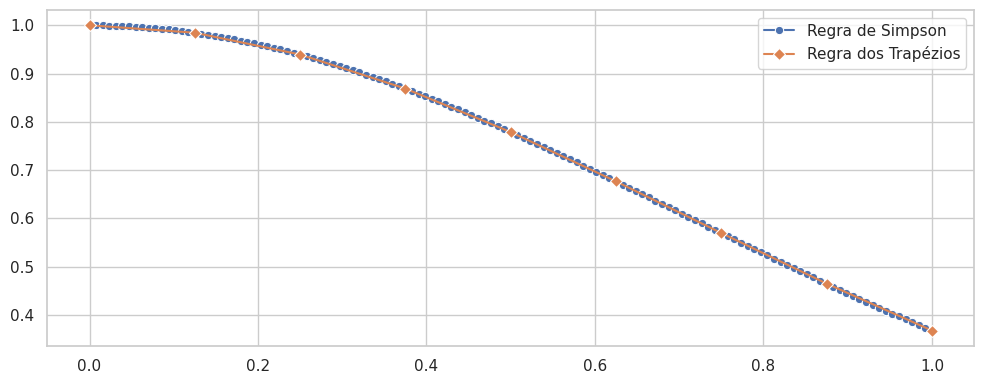

In [ ]:
n_values = [10, 20, 30, 40]

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

sns.lineplot(x=xi_simpson, y=yi_simpson, marker='o', ax=axes, label='Regra de Simpson')
sns.lineplot(x=xi_trapezios, y=yi_trapezios, marker='D', ax=axes,label='Regra dos Trapézios')

plt.tight_layout()
plt.show()

### B) $\int_{1}^{2} \ln(x+\sqrt{x+1})dx$

In [ ]:
def funcao(x):
    return np.log(x + np.sqrt(x + 1))

# Intervalo de integração
a = 1
b = 2

# Precisão desejada
epsilon = 1e-3

#### Regra dos Trapézios

In [ ]:
# Calculando usando a regra dos trapézios
xi_trapezios, yi_trapezios, resultado_trapezios = encontrar_particionamento(a, b, regra_trapezios, epsilon)

trapezios = pd.DataFrame({'X': xi_trapezios, 'y': yi_trapezios})

# Imprimindo os resultados
print(f"Resultados usando a regra dos trapézios: {resultado_trapezios}\n")
trapezios

Resultados usando a regra dos trapézios: 1.116410341996584



,X,y
0,1.000,0.881374
1,1.125,0.948850
2,1.250,1.011601
3,1.375,1.070248
4,1.500,1.125299
5,1.625,1.177172
6,1.750,1.226217
7,1.875,1.272729
8,2.000,1.316958


#### Regra de Simpson

In [ ]:
# Calculando usando a regra de Simpson
xi_simpson, yi_simpson, resultado_simpson = encontrar_particionamento(a, b, regra_simpson, epsilon)

simpson = pd.DataFrame({'X': xi_simpson, 'y': yi_simpson})

# Imprimindo os resultados
print(f"Resultados usando a regra de Simpson: {resultado_simpson}\n")
simpson

Resultados usando a regra de Simpson: 0.9334386783204046



,X,y
0,1.000000,0.881374
1,1.007812,0.885743
2,1.015625,0.890091
3,1.023438,0.894419
4,1.031250,0.898725
...,...,...
124,1.968750,1.306102
125,1.976562,1.308828
126,1.984375,1.311546
127,1.992188,1.314256


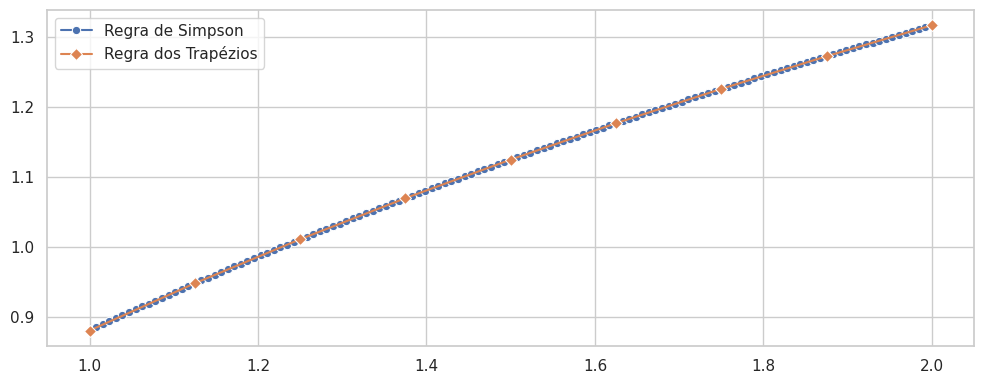

In [ ]:
n_values = [10, 20, 30, 40]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))

sns.lineplot(x=xi_simpson, y=yi_simpson, marker='o',  label='Regra de Simpson')
sns.lineplot(x=xi_trapezios, y=yi_trapezios, marker='D', label='Regra dos Trapézios')

plt.tight_layout()
plt.show()

## Exercício 3

Considere o problema do valor inicial (PVI) $y^{\prime} = \frac{y}{x} - \left( \frac{y}{x} \right)^2$, $1 < x < \leq 3$ e $y(1) = 1$. A solução analítica (exata) desse problema é dado pela equação $y(x) = \frac{x}{1+\ln x}$.

#### a. Usando o método de Euler, encontre uma solução aproximada para o PVI considerando $h=0.25$, $h=0$ e $h=0.05$.

#### b. Plote em um mesmo gráfico a solução analítica e cada uma das soluções obtidas no item anterior.

#### c. Plote em um mesmo gráfico os erros de cada uma das soluções obtidas no item *a* em função do valor de $x$.

In [ ]:

    num_pontos = int((xf - x0) / h) + 1
    x = np.linspace(x0, xf, num_pontos)
    y_aproximada = np.zeros(num_pontos)
    y_aproximada[0] = y0

    for i in range(1, num_pontos):
        y_aproximada[i] = y_aproximada[i-1] + h * (y_aproximada[i-1] / x[i-1] - (y_aproximada[i-1] / x[i-1])**2)

    return x, y_aproximada

def calcular_erros(x, y_aproximada):
    y_exata = solucao_analitica(x)
    erros = np.abs(y_exata - y_aproximada)
    return erros, y_exata


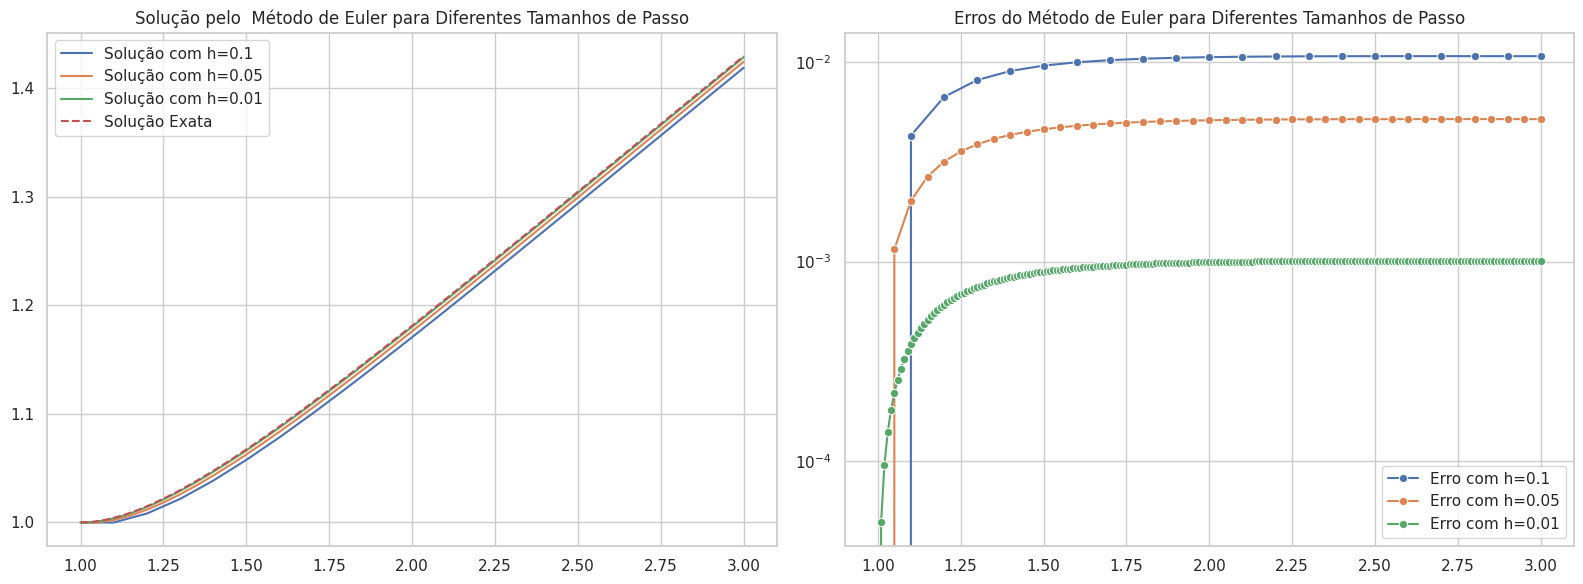

In [ ]:
# Condições iniciais
x0 = 1
y0 = 1

# Intervalo de solução
xf = 3

# Tamanhos de passo
h_values = [0.1, 0.05, 0.01]

# Plotagem dos resultados
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for h in h_values:
    x, y_aproximada = euler(h, x0, y0, xf)
    sns.lineplot(x=x, y=y_aproximada, label=f'Solução com h={h}', ax=axes[0])

    erros, sol_exata = calcular_erros(x, y_aproximada)
    sns.lineplot(x=x, y=erros, label=f'Erro com h={h}', marker='o', ax=axes[1])

sns.lineplot(x=x, y=sol_exata, label=f'Solução Exata', linestyle='--', ax=axes[0])

axes[0].set_title('Solução pelo  Método de Euler para Diferentes Tamanhos de Passo')
axes[1].set_title('Erros do Método de Euler para Diferentes Tamanhos de Passo')

axes[1].set_yscale('log')  # Escala logarítmica para melhor visualização

plt.legend()

plt.tight_layout()
plt.show()

## Exercício 4

Repita o procedimento do exercício anterior usando o método de Runge-Kutta.

In [ ]:
def solucao_analitica(x):
    return x / (1 + np.log(x))

def runge_kutta(h, x0, y0, xf):
    num_pontos = int((xf - x0) / h) + 1
    x = np.linspace(x0, xf, num_pontos)
    y = np.zeros(num_pontos)
    y[0] = y0

    for i in range(1, num_pontos):
        k1 = h * (y[i-1] / x[i-1] - (y[i-1] / x[i-1])**2)
        k2 = h * ((y[i-1] + k1/2) / (x[i-1] + h/2) - ((y[i-1] + k1/2) / (x[i-1] + h/2))**2)
        k3 = h * ((y[i-1] + k2/2) / (x[i-1] + h/2) - ((y[i-1] + k2/2) / (x[i-1] + h/2))**2)
        k4 = h * ((y[i-1] + k3) / (x[i-1] + h) - ((y[i-1] + k3) / (x[i-1] + h))**2)

        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return x, y

def calcular_erros(x, y_aproximada):
    y_exata = solucao_analitica(x)
    erros = np.abs(y_exata - y_aproximada)
    return erros, y_exata

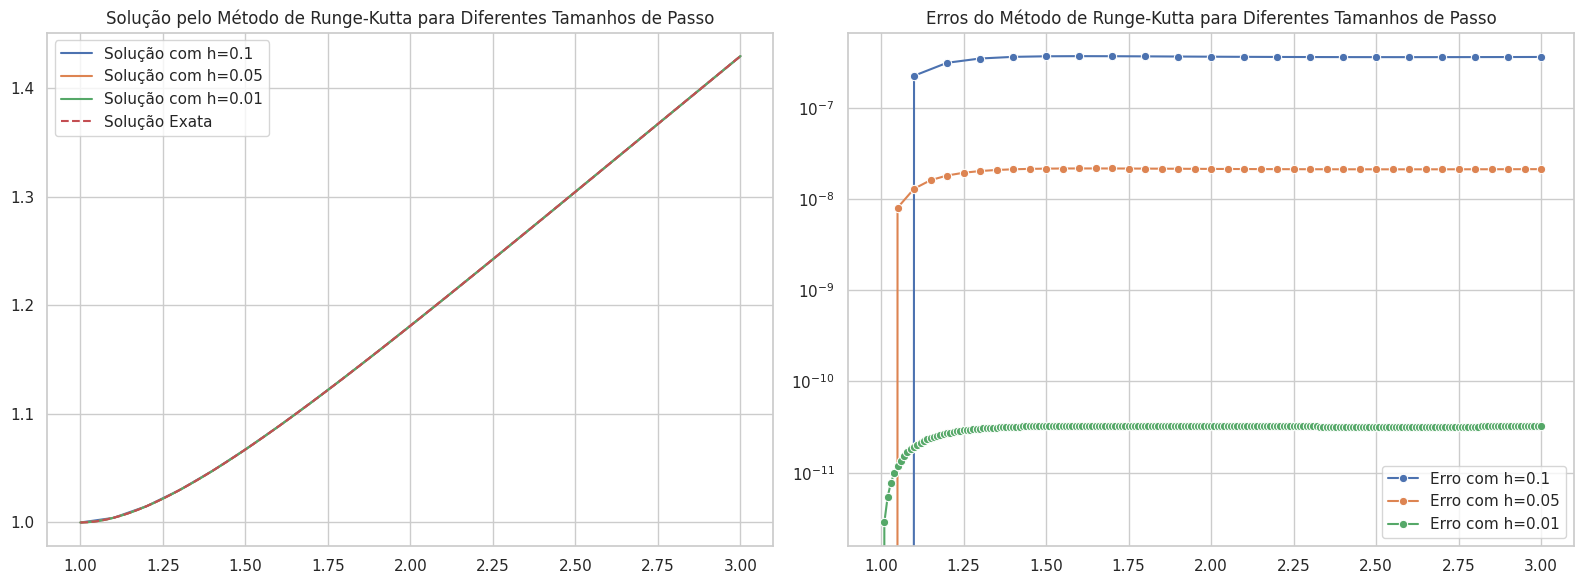

In [ ]:
# Condições iniciais
x0 = 1
y0 = 1

# Intervalo de solução
xf = 3

# Tamanhos de passo
h_values = [0.1, 0.05, 0.01]

# Plotagem dos resultados
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for h in h_values:
    x, y_aproximada = runge_kutta(h, x0, y0, xf)
    sns.lineplot(x=x, y=y_aproximada, label=f'Solução com h={h}', ax=axes[0])

    erros, sol_exata = calcular_erros(x, y_aproximada)
    sns.lineplot(x=x, y=erros, label=f'Erro com h={h}', marker='o', ax=axes[1])

sns.lineplot(x=x, y=sol_exata, label=f'Solução Exata', linestyle='--', ax=axes[0])

axes[0].set_title('Solução pelo Método de Runge-Kutta para Diferentes Tamanhos de Passo')
axes[1].set_title('Erros do Método de Runge-Kutta para Diferentes Tamanhos de Passo')

axes[1].set_yscale('log')  # Escala logarítmica para melhor visualização

plt.legend()

plt.tight_layout()
plt.show()

## Exercício 5

Use um método em diferenças finitas (com diferenças centradas para a derivada de primeira ordem) para obter uma solução aproximada do problema de valor de contorno (PVC) $y^{\prime\prime} = y^{\prime} - xy - e^x(x^2 + 1)$ para $0<x<1$, com $y(0)=1$ e $y(1) = e$. Obtenha a solução para $h=0.1$, $h=0.05$ e $h=0.01$. Faça a plotagem em um mesmo gráfico das três soluções obtidas.

In [ ]:
def funcao(x):
    return np.exp(x) * (x**2 + 1)

def diferenca_finita(h, a, b, ya, yb):
    N = int((b - a) / h) + 1
    x = np.linspace(a, b, N)
    A = np.zeros((N, N))
    F = np.zeros(N)

    # Preenchendo a matriz A e o vetor F
    for i in range(1, N-1):
        A[i, i-1] = 1 / h**2 - x[i] / (2 * h)
        A[i, i] = -2 / h**2 + funcao(x[i])
        A[i, i+1] = 1 / h**2 + x[i] / (2 * h)
        F[i] = -funcao(x[i])

    # Condições de contorno
    A[0, 0] = 1
    F[0] = ya
    A[-1, -1] = 1
    F[-1] = yb

    # Resolvendo o sistema linear
    y = np.linalg.solve(A, F)

    return x, y

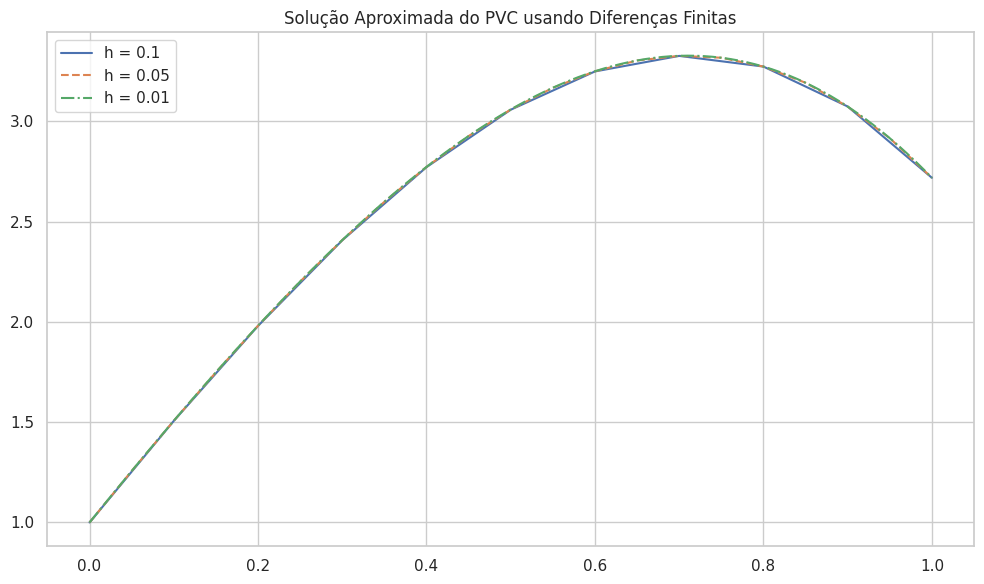

In [ ]:
# Condições de contorno
a = 0
b = 1
ya = 1
yb = np.exp(1)

# Tamanhos de passo
h_values = [0.1, 0.05, 0.01]

# Plotagem das soluções
plt.figure(figsize=(10, 6))

lines = ['-', '--', '-.']
for i, h in enumerate(h_values):
    x, y = diferenca_finita(h, a, b, ya, yb)
    sns.lineplot(x=x, y=y, label=f'h = {h}',  linestyle=lines[i])

plt.title('Solução Aproximada do PVC usando Diferenças Finitas')
plt.legend()
plt.tight_layout()
plt.show()
